In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Error: Could not import pydca. Please make sure it is installed and available in your system. No module named 'pydca'


# Measure Frustration of Complete PDB

In [2]:
structure=dca_frustratometer.Structure.full_pdb('./data/1l63.pdb',"A")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


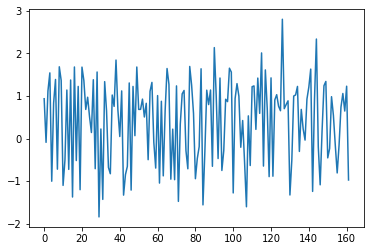

In [3]:
plt.plot(model.frustration(kind='singleresidue'))

In [4]:
print(model.native_energy())

-800.6030499840181


/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


(0.0, 20.0)

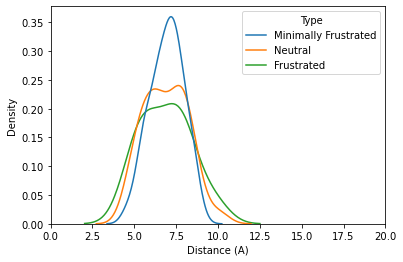

In [5]:
mutational_frustration_values_dataframe=model.view_frustration_distribution(kind="mutational")
mutational_frustration_values_dataframe=mutational_frustration_values_dataframe.dropna(subset=["F_ij"])
###
sns.kdeplot(data=mutational_frustration_values_dataframe,x="Distance_ij",hue="Type",common_norm=False)
plt.xlabel("Distance (A)")
plt.xlim([0,20])

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


(0.0, 20.0)

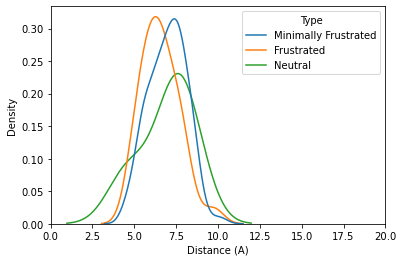

In [6]:
configurational_frustration_values_dataframe=model.view_frustration_distribution(kind="configurational")
configurational_frustration_values_dataframe=configurational_frustration_values_dataframe.dropna(subset=["F_ij"])
###
sns.kdeplot(data=configurational_frustration_values_dataframe,x="Distance_ij",hue="Type",common_norm=False)
plt.xlabel("Distance (A)")
plt.xlim([0,20])

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


<AxesSubplot:>

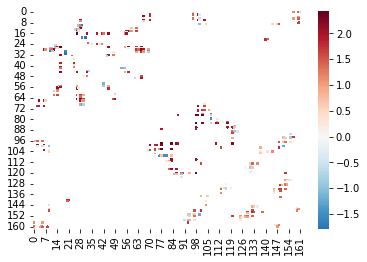

In [7]:
sns.heatmap(model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

<AxesSubplot:>

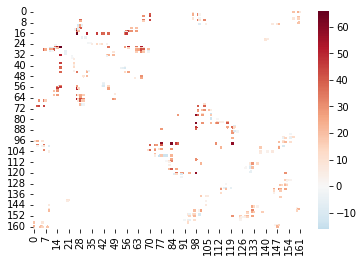

In [8]:
sns.heatmap(model.frustration(kind='configurational'),cmap='RdBu_r',center=0)

<AxesSubplot:>

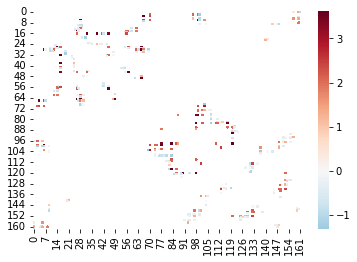

In [9]:
sns.heatmap(model.frustration(kind='contact'),cmap='RdBu_r',center=0)

<AxesSubplot:>

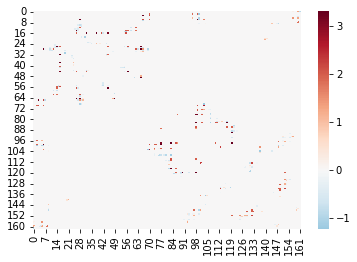

In [10]:
sns.heatmap(model.frustration(kind='contact',correction=0.1),cmap='RdBu_r',center=0)

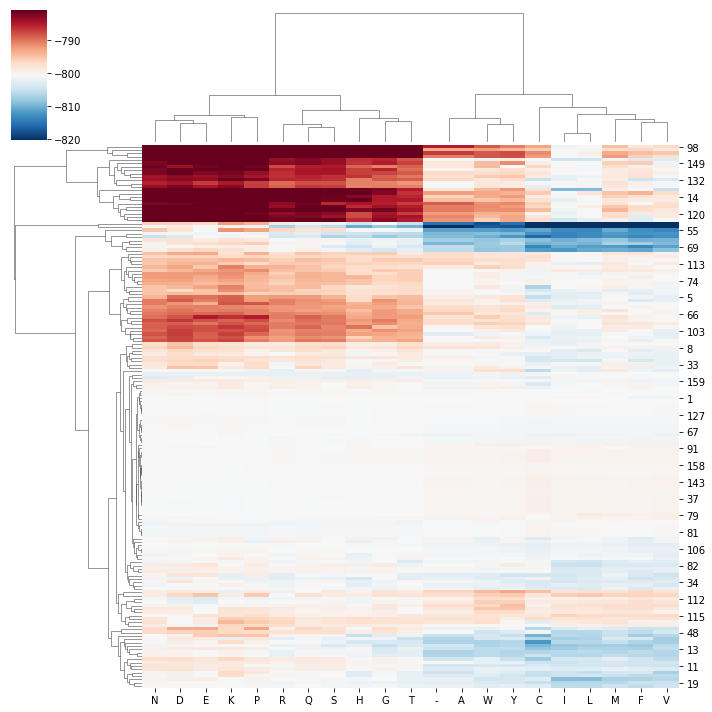

In [11]:
model.plot_decoy_energy(kind='singleresidue')

In [12]:
#sns.clustermap(model.decoy_energy('mutational').reshape(-1,21*21))

In [13]:
model.decoy_fluctuation(kind='singleresidue').mean()

2.0684778358498632

In [14]:
model.decoy_fluctuation(kind='mutational').mean()

0.12617140097162272

In [15]:
model.decoy_fluctuation(kind='contact').mean()

0.015780082796613967

In [16]:
model.view_frustration()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
# model.vmd()

In [18]:
# model.view_frustration(pair='contact',correction=0.1,max_connections=400)

# Compare Lammps AWSEM and DCA Frustratometer Frustration Values

## Cyclophilin A (PDB: 6U5E)

In [19]:
structure=dca_frustratometer.Structure.full_pdb('./data/6U5E_A.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=10)
#Calculate mutational frustation
frustratometer_mutational_frustration=AWSEM_model.frustration(kind="mutational")

@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2475
  PDBConstructionWarning,
@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


In [20]:
#Import Lammps AWSEM mutational frustration values
lammps_mutational_frustration_dataframe=pd.read_csv("./data/6U5E_A_tertiary_frustration.dat",header=0,sep="\s+")

lammps_mutational_frustration=np.full((163, 163), np.nan)
for index,row in lammps_mutational_frustration_dataframe.iterrows():
    lammps_mutational_frustration[row.i-1,row.j-1]=row.f_ij
    lammps_mutational_frustration[row.j-1,row.i-1]=row.f_ij

In [21]:
merged_mutational_frustration=np.triu(lammps_mutational_frustration)+np.tril(frustratometer_mutational_frustration)

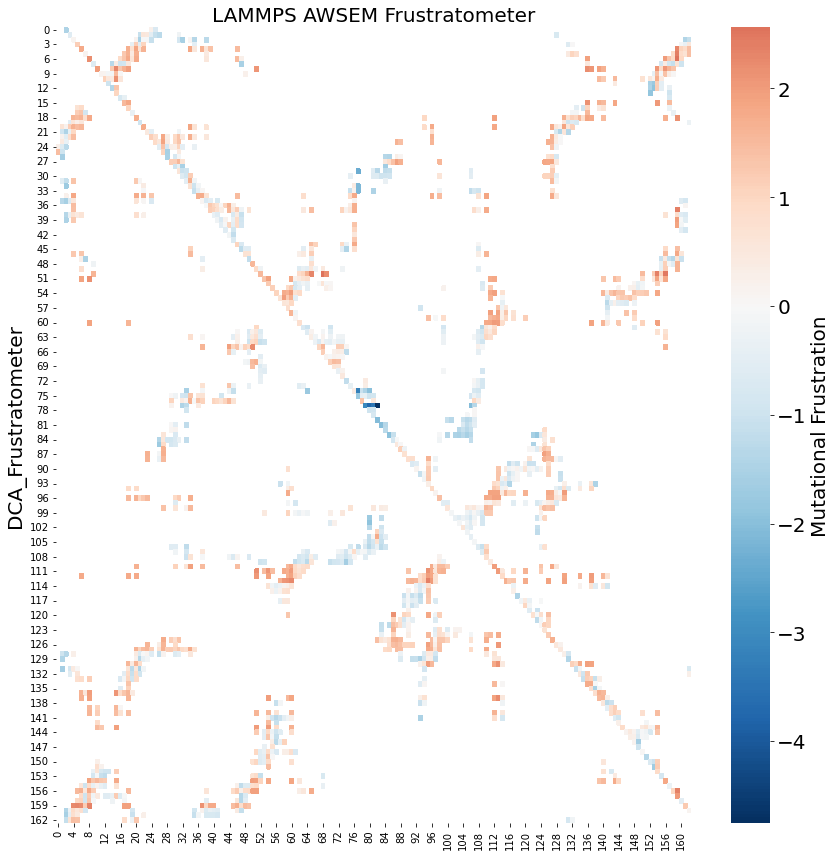

In [22]:
plt.figure(figsize=(12,12))

g=sns.heatmap(merged_mutational_frustration,cmap="RdBu_r",center=0,cbar_kws={'label': 'Mutational Frustration'})
g.set_title("LAMMPS AWSEM Frustratometer",fontsize=20)
g.set_ylabel("DCA_Frustratometer",fontsize=20)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
g.figure.axes[-1].yaxis.label.set_size(20)

plt.tight_layout()
plt.savefig("./data/6U5E_A_Lammps_AWSEM_vs_Frustratometer_Frustration_Comparison.png")

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [23]:
#Use original pdb residue numbering when providing initial and final indices.
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  PDBConstructionWarning,
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [24]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Cytochrome C (PDB: 1CYC)

In [25]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",seq_selection="resindex `0to50`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  PDBConstructionWarning,
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [26]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## TIM (PDB: 1TIM)

In [27]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1tim.pdb',"A",seq_selection="resindex `30to80`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 3758 atoms and 1 coordinate set(s) were parsed in 0.03s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3762
  PDBConstructionWarning,
@> 3758 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [28]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Trypsin (PDB: 3PTN)

In [29]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/3ptn.pdb',"A",seq_selection="resindex `40to65`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 3220 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3220 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [30]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## FGF (PDB: 1RG8)

In [31]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rg8.pdb',"A",seq_selection="resindex `10to55`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2250
  PDBConstructionWarning,
@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [32]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol